## Complete the EDA with Visualization

In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage. 

In this lab, you will perform Exploratory Data Analysis and Feature Engineering.

## Objectives
Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

- Exploratory Data Analysis
- Preparing Data  Feature Engineering 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# use the df created in the Xd part
df = pd.read_csv('falcon_df2.csv')
df.head()

,Unnamed: 0,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,class
0,0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [3]:
df.head()

,Unnamed: 0,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,class
0,0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


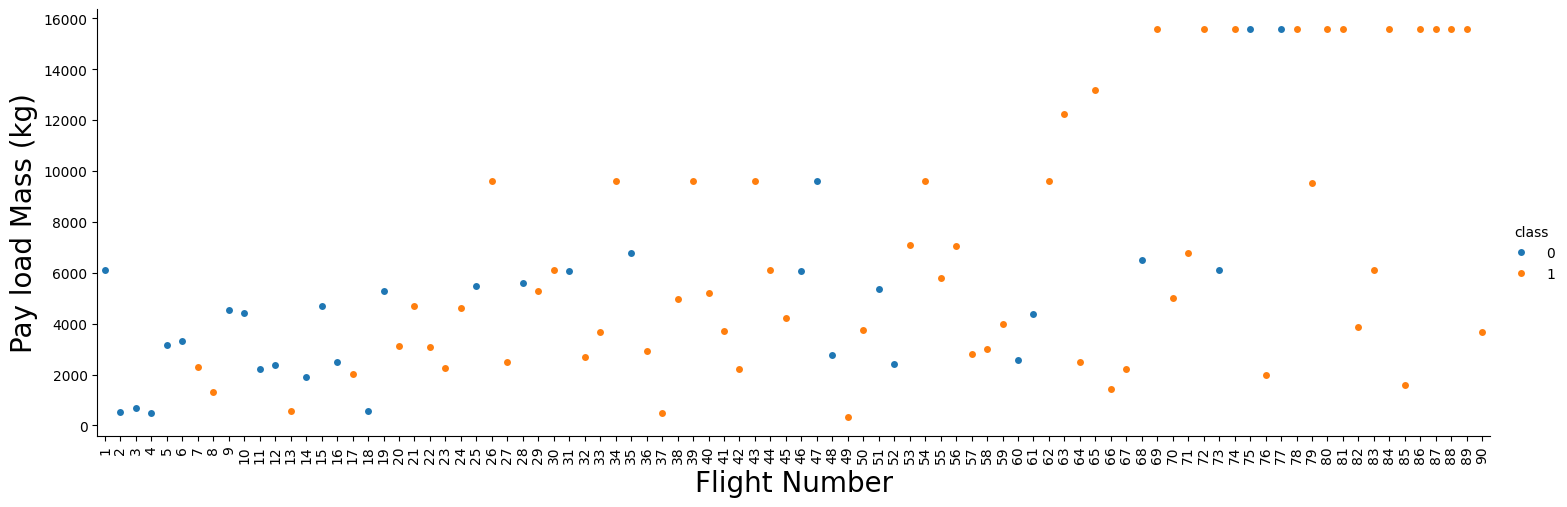

In [4]:
sns.catplot(y='PayloadMass', x='FlightNumber', hue='class', data=df, aspect=3)
plt.xlabel("Flight Number",fontsize=20)
plt.xticks(rotation=90)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

### TASK 1: Visualize the relationship between Flight Number and Launch Site

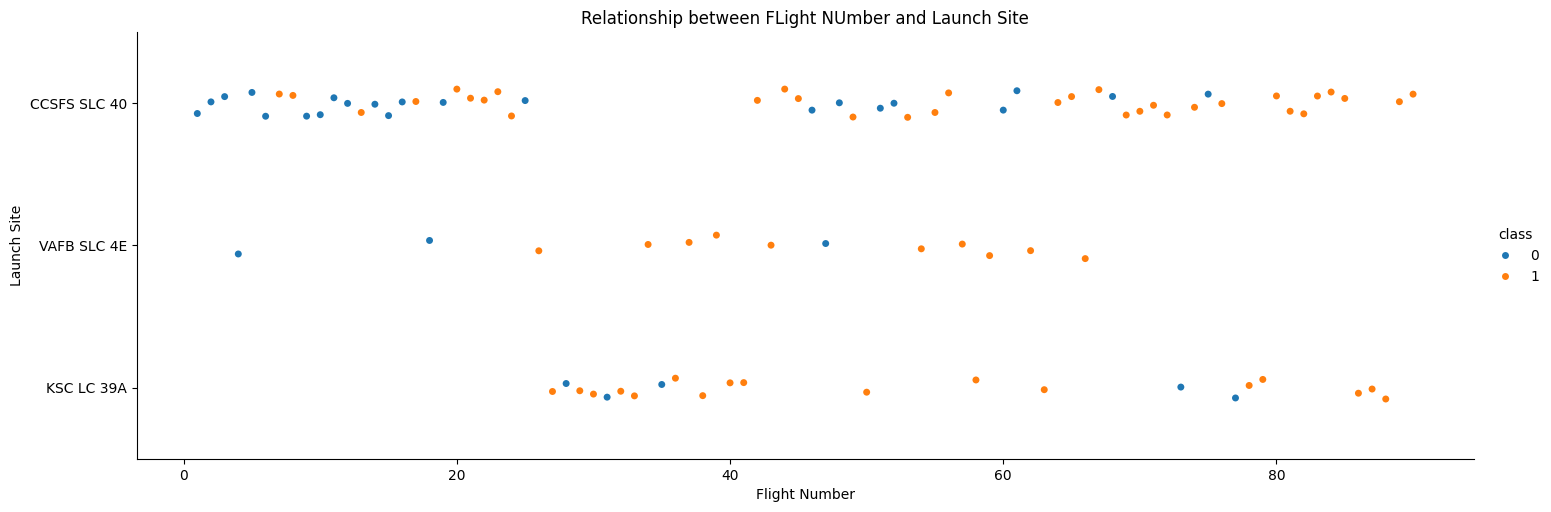

In [5]:
sns.catplot(x='FlightNumber', y='LaunchSite', hue='class', data=df, aspect=3)
plt.title('Relationship between FLight NUmber and Launch Site')
plt.xlabel('Flight Number')
plt.ylabel('Launch Site')
plt.show()

### TASK 2: Visualize the relationship between Payload and Launch Site


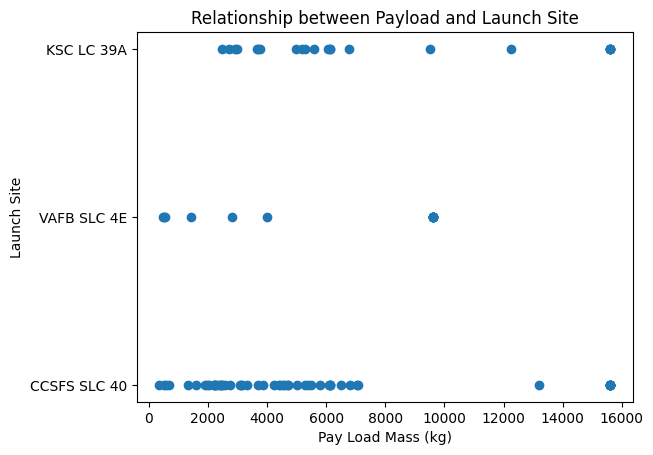

In [6]:
plt.scatter(df['PayloadMass'], df['LaunchSite'])
plt.title('Relationship between Payload and Launch Site')
plt.xlabel('Pay Load Mass (kg)')
plt.ylabel('Launch Site')
plt.show()

From the plot, it is clear that for the VAFB-SLC 4E launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).

### TASK  3: Visualize the relationship between success rate of each orbit type

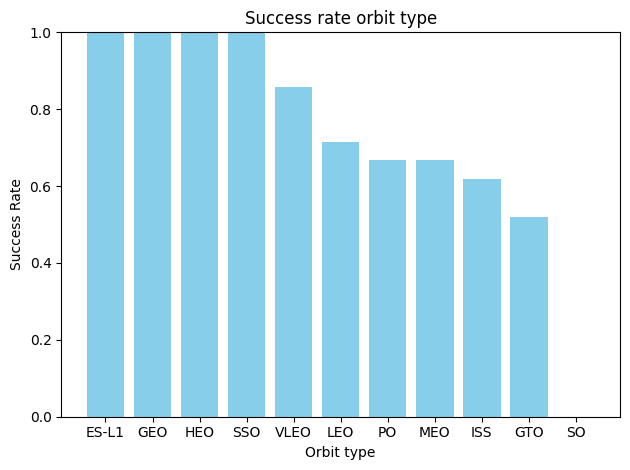

In [19]:
# find the average success rate for each orbit type
sr_orbit = df.groupby('Orbit')['class'].mean().sort_values(ascending=False)

plt.bar(sr_orbit.index, sr_orbit.values, color='skyblue')
plt.title('Success rate orbit type')
plt.xlabel('Orbit type')
plt.ylabel('Success Rate')
plt.ylim(0, 1)  # because success rate ranges from 0 to 1
plt.tight_layout()
plt.show()

### TASK  4: Visualize the relationship between FlightNumber and Orbit type


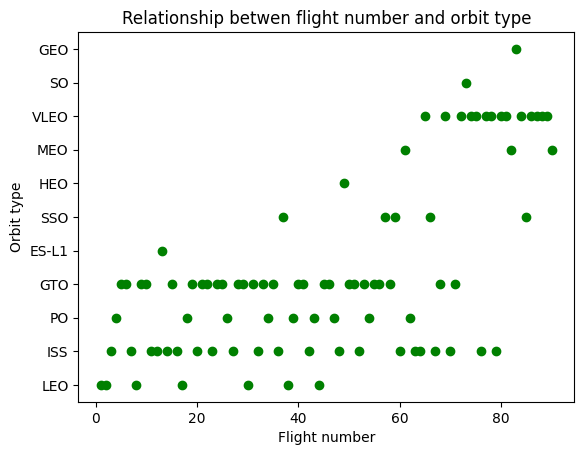

In [8]:
plt.scatter(df['FlightNumber'], df['Orbit'], color='green')
plt.title('Relationship betwen flight number and orbit type')
plt.xlabel('Flight number')
plt.ylabel('Orbit type')
plt.show()

in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.

### TASK  5: Visualize the relationship between Payload and Orbit type

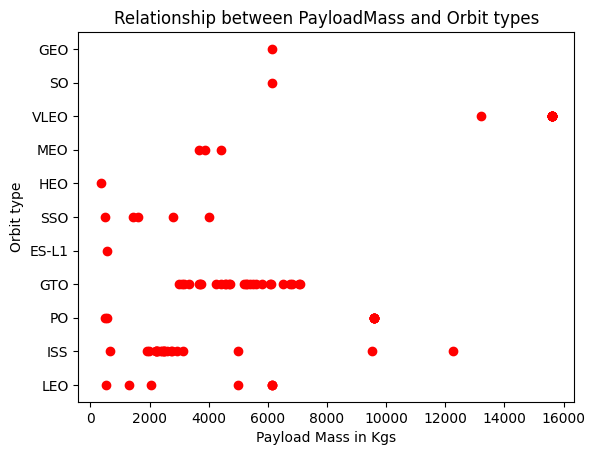

In [9]:
plt.scatter(df['PayloadMass'],df['Orbit'],color='red')
plt.title('Relationship between PayloadMass and Orbit types')
plt.xlabel('Payload Mass in Kgs')
plt.ylabel('Orbit type')
plt.show()

With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.   

However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.

### TASK  6: Visualize the launch success yearly trend


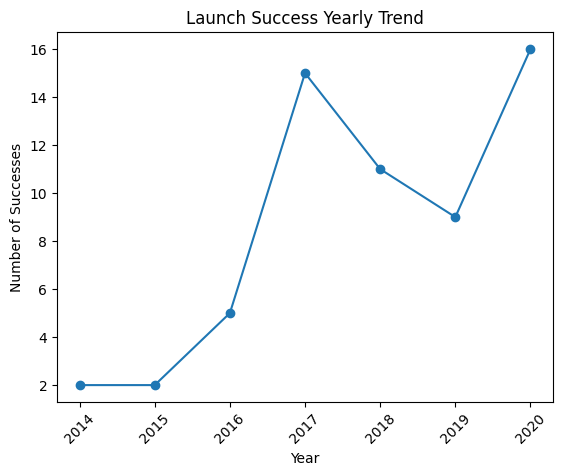

In [10]:
# Extract years from the date column
df['Year'] = df['Date'].str.split("-").str[0]

# remove rows with missing outcome or year
df = df.dropna(subset = ['Year','class'])

# ensure that class is integer
df['class'] = df['class'].astype(int)

# Group and Count successful launches per year
yrly_success = df[df['class']==1].groupby('Year').size()

# Plot the result
plt.plot(yrly_success.index, yrly_success.values, marker='o')
plt.title('Launch Success Yearly Trend')
plt.xlabel('Year')
plt.ylabel('Number of Successes')
plt.xticks(rotation=45)
plt.show()

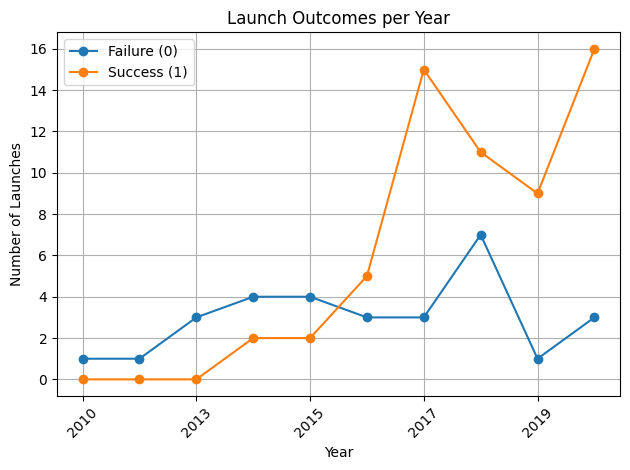

In [11]:
# lets see both success and failures
# Group by Year and Class (0 or 1)
outcome_counts = df.groupby(['Year', 'class']).size().unstack(fill_value=0)

# Plot both
outcome_counts = outcome_counts.sort_index()
outcome_counts.plot(kind='line', marker='o')
plt.title('Launch Outcomes per Year')
plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.xticks(rotation=45)
plt.legend(['Failure (0)', 'Success (1)'])
plt.grid(True)
plt.tight_layout()
plt.show()


the success rate since 2013 kept increasing till 2017 (stable in 2014) and after 2015 it started increasing.

### Feature Engineering

In [12]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6123.547647,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [13]:
print(yrly_success)

Year
2014     2
2015     2
2016     5
2017    15
2018    11
2019     9
2020    16
dtype: int64


 ### TASK  7: Create dummy variables to categorical columns
Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [14]:
# create a list of names of categorical features
categorical_cols = ['Orbit', 'LaunchSite','LandingPad', 'Serial']

# use get_dummies()
features_oh = pd.get_dummies(features, columns=categorical_cols)

# convert the dummies to float type
features_oh = features_oh.astype('float64')

features_oh.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6123.547647,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### TASK  8: Cast all numeric columns to `float64`


In [15]:
# Cast only numeric columns to float64

#features_oh[features_oh.select_dtypes(include='number').columns] = \
    #features_oh.select_dtypes(include='number').astype('float64')


For task-8, the step was already done in the task7, converting to float type. So its ok even if we dont execute this cell

In [16]:
# export the dataset

features_oh.to_csv('falcon_df3.csv', index=False)

In [17]:
yrly_success

Year
2014     2
2015     2
2016     5
2017    15
2018    11
2019     9
2020    16
dtype: int64

In [18]:
df['Outcome'].unique()

array(['None None', 'False Ocean', 'True Ocean', 'False ASDS',
       'None ASDS', 'True RTLS', 'True ASDS', 'False RTLS'], dtype=object)